In [ ]:
# Importing Dependencies

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
import datetime

In [ ]:
# Importing dataset

dataset=pd.read_csv('Uberdata.csv')

In [ ]:
dataset.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [ ]:
dataset.tail()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Karachi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [ ]:
# Dimensions of the dataset
dataset.shape

(1156, 7)

In [ ]:
# Size of the dataset
dataset.size

8092

In [ ]:
# Column name and Non-null count in the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [ ]:
# Checking missing values for each column present in the dataset

dataset.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [ ]:
# Checking the total number of missing values in the dataset

dataset.isnull().values.sum()

507

In [ ]:
# Dropping all missing values

uberdata=dataset.dropna()
uberdata.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

In [ ]:
uberdata.isnull().values.sum()

0

In [ ]:
# New dataframe information

uberdata.describe()

,MILES*
count,653.000000
mean,11.196325
std,22.986429
min,0.500000
25%,3.200000
50%,6.400000
75%,10.400000
max,310.300000


In [ ]:
# Getting all unique start destinations

uniquestarts=uberdata["START*"]
unique_start_destinations=set(uniquestarts)
unique_start_destinations

{'Apex',
 'Arabi',
 'Asheville',
 'Austin',
 'Banner Elk',
 'Bellevue',
 'Berkeley',
 'Boone',
 'Briar Meadow',
 'Burtrose',
 'CBD',
 'Capitol One',
 'Cary',
 'Chalmette',
 'Chapel Hill',
 'Chessington',
 'Colombo',
 'Daytona Beach',
 'Downtown',
 'Durham',
 'Eagan Park',
 'East Austin',
 'East Elmhurst',
 'East Harlem',
 'Eastgate',
 'Edgehill Farms',
 'El Cerrito',
 'Elmhurst',
 'Emeryville',
 'Fairmont',
 'Farmington Woods',
 'Fayetteville Street',
 'Financial District',
 'Flatiron District',
 'Florence',
 'Fort Pierce',
 'Fuquay-Varina',
 'Galveston',
 'Gampaha',
 'Georgian Acres',
 'Gulfton',
 'Hazelwood',
 "Hell's Kitchen",
 'Heritage Pines',
 'Holly Springs',
 'Houston',
 'Hudson Square',
 'Huntington Woods',
 'Ingleside',
 'Islamabad',
 'Jacksonville',
 'Jamaica',
 'Karachi',
 'Katunayaka',
 'Katunayake',
 'Katy',
 'Kenner',
 'Kilarney Woods',
 'Kissimmee',
 'Krendle Woods',
 'Lahore',
 'Lake Reams',
 'Lake Wellingborough',
 'Latta',
 'Lexington Park at Amberly',
 'Long Island 

In [ ]:
# Getting total number of unique start locations

len(unique_start_destinations)

131

In [ ]:
# Getting all unique stop locations

uniquestops=uberdata["STOP*"]
unique_stop_locations=set(uniquestops)
unique_stop_locations

{'Agnew',
 'Alief',
 'Apex',
 'Arabi',
 'Asheville',
 'Banner Elk',
 'Bay Farm Island',
 'Bellevue',
 'Berkeley',
 'Boone',
 'Burtrose',
 'Capitol One',
 'Cary',
 'Cedar Hill',
 'Chalmette',
 'Chapel Hill',
 'Chessington',
 'Colombo',
 'Congress Ave District',
 'Convention Center District',
 'Coxville',
 'Daytona Beach',
 'Depot Historic District',
 'Downtown',
 'Durham',
 'East Harlem',
 'Edgehill Farms',
 'El Cerrito',
 'Emeryville',
 'Faubourg Marigny',
 'Financial District',
 'Florence',
 'Fort Pierce',
 'Fuquay-Varina',
 'Galveston',
 'Gampaha',
 'Gramercy-Flatiron',
 'Greater Greenspoint',
 'Gulfton',
 'Harden Place',
 'Hayesville',
 'Hazelwood',
 "Hell's Kitchen",
 'Heritage Pines',
 'Hog Island',
 'Holly Springs',
 'Houston',
 'Hudson Square',
 'Ilukwatta',
 'Islamabad',
 'Jacksonville',
 'Jamaica',
 'Jamestown Court',
 'Karachi',
 'Katunayaka',
 'Katy',
 'Kenner',
 'Kildaire Farms',
 'Kips Bay',
 'Kissimmee',
 'Lahore',
 'Lake Reams',
 'Lakeview',
 'Latta',
 'Leesville Hollow'

In [ ]:
# Total count of unique stop locations

len(unique_stop_locations)

137

In [ ]:
# Getting the most popular starting point for uber drives

startingpoint=uberdata["START*"]
df=pd.DataFrame(startingpoint.value_counts())
df.sort_values(["START*"],ascending=False)

df=df.reset_index()
df=df.rename(columns={'index':'Starting_Location','START*':'Count'})
print(df)

    Starting_Location  Count
0                Cary    161
1    Unknown Location     55
2         Morrisville     54
3         Whitebridge     36
4              Durham     30
..                ...    ...
126   Lower Manhattan      1
127        Lake Reams      1
128             Latta      1
129      Briar Meadow      1
130           Gampaha      1

[131 rows x 2 columns]


In [ ]:
df.loc[df['Count']==max(df['Count'])]

,Starting_Location,Count
0,Cary,161


In [ ]:
# Getting the most popular dropping location for Uber drivers

startingpoint=uberdata["STOP*"]
df=pd.DataFrame(startingpoint.value_counts())
df.sort_values(["STOP*"],ascending=False)

df=df.reset_index()
df=df.rename(columns={'index':'Dropping_Location','STOP*':'Count'})
print(df)

    Dropping_Location  Count
0                Cary    155
1         Morrisville     60
2    Unknown Location     56
3         Whitebridge     37
4              Durham     30
..                ...    ...
132        Cedar Hill      1
133          Florence      1
134         Ridgeland      1
135     Daytona Beach      1
136         Ilukwatta      1

[137 rows x 2 columns]


In [ ]:
df.loc[df['Count']==max(df['Count'])]

,Dropping_Location,Count
0,Cary,155


In [ ]:
# Anlyzing the most frequent route taken by Uber drivers

df=uberdata.dropna()
df=pd.DataFrame(df.groupby(['START*','STOP*']).size())
df=df.rename(columns={0:'Count'})
df=df.sort_values(['Count'],ascending=False)
df.loc[df['Count']==max(df['Count'])]

,,Count
START*,STOP*,
Cary,Morrisville,52


In [ ]:
# Analyzing the purposes of Uber rides by the customers

print(np.array(uberdata['PURPOSE*'].unique()))
uberdata['MILES*'].groupby(uberdata['PURPOSE*']).sum()

['Meal/Entertain' 'Errand/Supplies' 'Meeting' 'Customer Visit'
 'Temporary Site' 'Between Offices' 'Charity ($)' 'Commute' 'Moving'
 'Airport/Travel']


PURPOSE*
Airport/Travel       16.5
Between Offices     197.0
Charity ($)          15.1
Commute             180.2
Customer Visit     2089.5
Errand/Supplies     508.0
Meal/Entertain      911.7
Meeting            2851.3
Moving               18.2
Temporary Site      523.7
Name: MILES*, dtype: float64

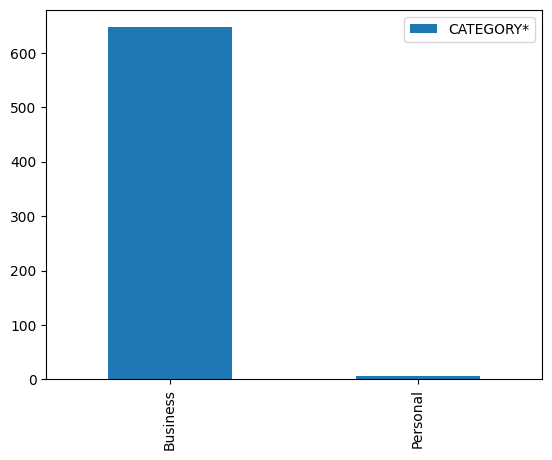

In [ ]:
# Analyzing catrgories of Uber trips.

df=pd.DataFrame(uberdata['CATEGORY*'].value_counts())
df.reset_index()
df.plot(kind='bar')
plt.show()

<Axes: ylabel='Frequency'>

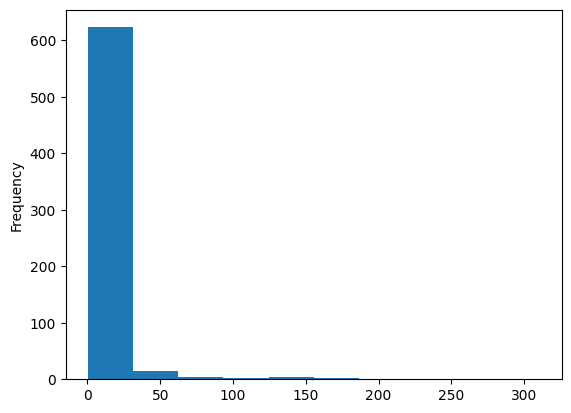

In [ ]:
# Number of miles customers take Uber for

uberdata['MILES*'].plot.hist()

<Axes: >

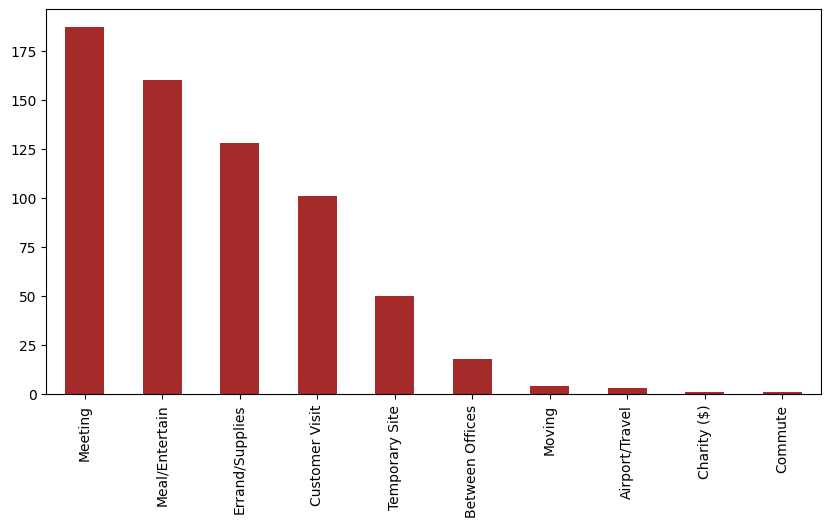

In [ ]:
# Purpose of customers for taking a Uber.

uberdata['PURPOSE*'].value_counts().plot(kind='bar',figsize=(10,5),color='brown')

<Axes: ylabel='Frequency'>

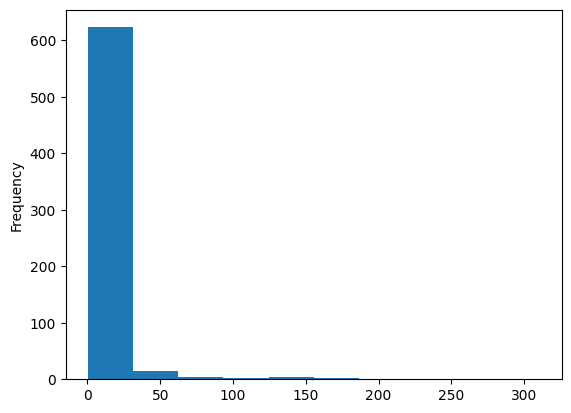

In [ ]:
# How long(distance) do people travel with Uber

uberdata['MILES*'].plot.hist()

<Axes: >

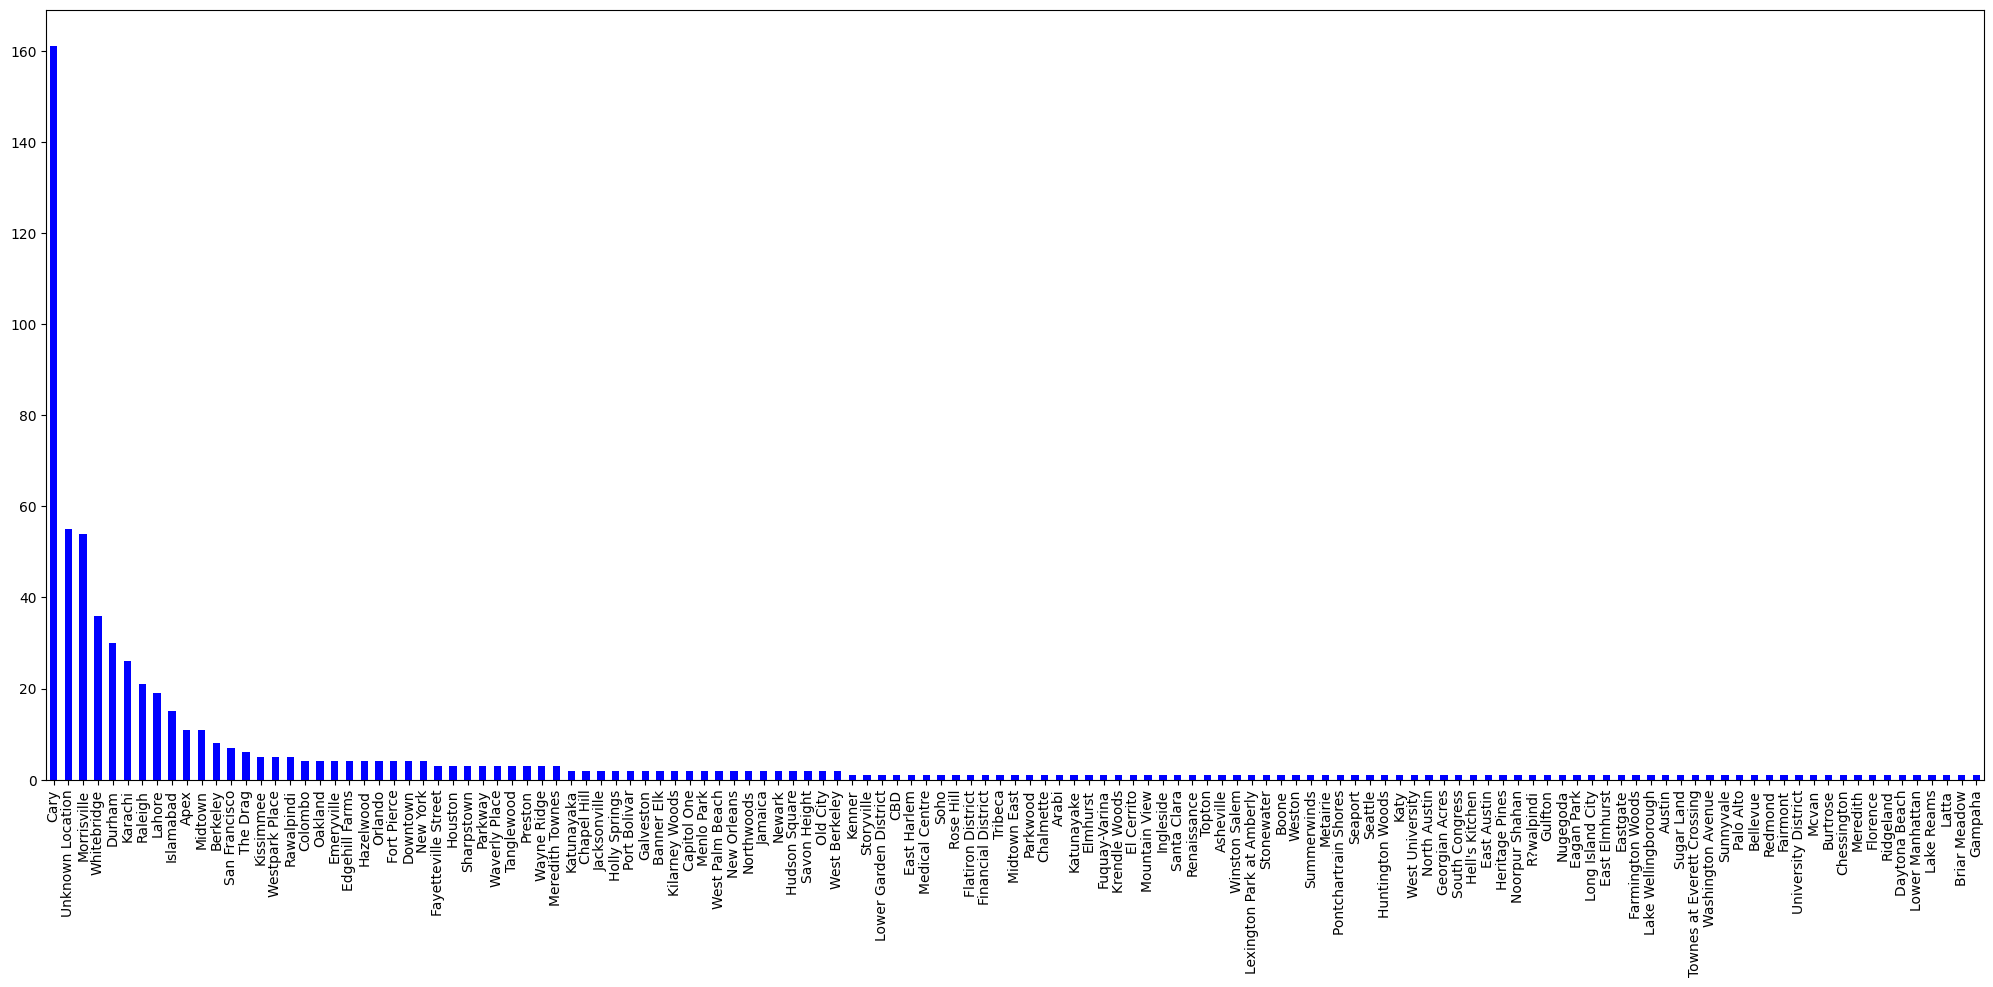

In [ ]:
# Most popular starting point and other starting points popularity

uberdata['START*'].value_counts().plot(kind='bar',figsize=(25,10),color='blue')